In [1]:
print("Phan Đức An - 6351071001")

Phan Đức An - 6351071001


## Import thư viện

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

##  Nhập dữ liệu và tiền xử lý

In [3]:
# Đọc dữ liệu Heart Disease
data = pd.read_csv('datasets/heart.csv')

print("Thông tin dữ liệu Heart Disease ban đầu:")
print(f"Số lượng dữ liệu: {len(data)}")
print(f"Số lượng cột: {len(data.columns)}")
print("\nTên các cột ban đầu:")
print(data.columns.tolist())
print("\nMẫu dữ liệu:")
display(data.head(10))

Thông tin dữ liệu Heart Disease ban đầu:
Số lượng dữ liệu: 303
Số lượng cột: 14

Tên các cột ban đầu:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Mẫu dữ liệu:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
# Đổi tên các cột theo yêu cầu
new_column_names = {
    'age': 'age',
    'sex': 'sex',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'rest_ecg',
    'thalach': 'max_heart_rate_achieved',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia',
    'target': 'target'
}

data = data.rename(columns=new_column_names)

print("Tên các cột sau khi đổi:")
print(data.columns.tolist())
print("\nMẫu dữ liệu sau khi đổi tên:")
display(data.head())

Tên các cột sau khi đổi:
['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

Mẫu dữ liệu sau khi đổi tên:


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Kiểm tra giá trị thiếu
print("Kiểm tra giá trị thiếu:")
missing_values = data.isnull().sum()
print(missing_values)
print(f"\nTổng số giá trị thiếu: {missing_values.sum()}")

# Xóa các dòng có giá trị thiếu (nếu có)
if missing_values.sum() > 0:
    print(f"\nSố dòng trước khi xóa: {len(data)}")
    data = data.dropna()
    print(f"Số dòng sau khi xóa: {len(data)}")
else:
    print("\nKhông có giá trị thiếu trong dữ liệu.")

Kiểm tra giá trị thiếu:
age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

Tổng số giá trị thiếu: 0

Không có giá trị thiếu trong dữ liệu.


In [6]:
# Thông tin chi tiết về dữ liệu
print("\nThông tin chi tiết:")
print(data.info())
print("\nThống kê mô tả:")
display(data.describe())


Thông tin chi tiết:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: fl

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



Phân bố thuộc tính target (0: Không có bệnh, 1: Có bệnh tim):
target
0    138
1    165
Name: count, dtype: int64


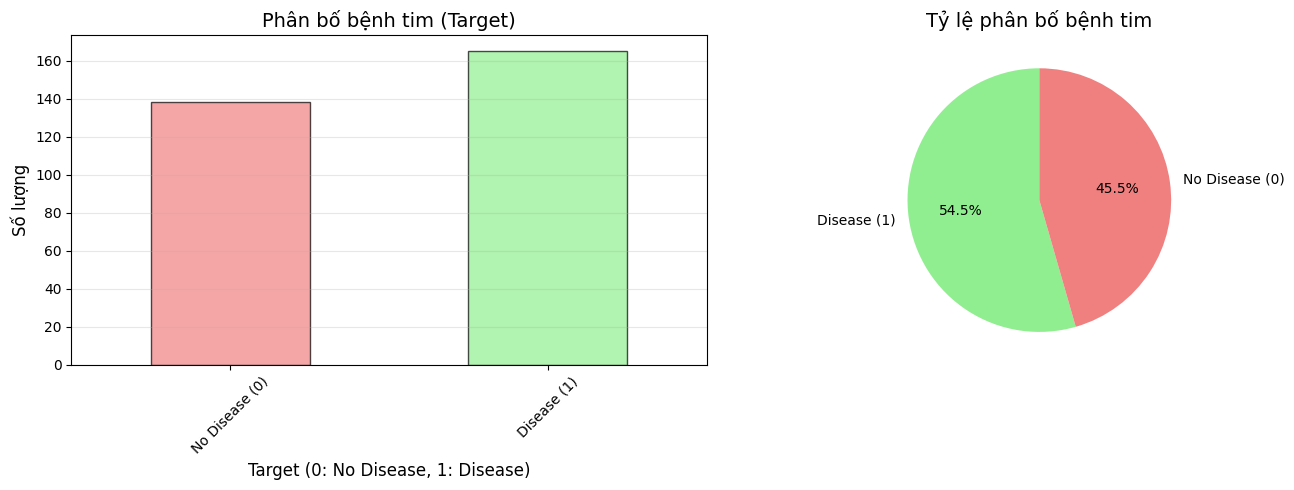

In [7]:
# Phân bố của thuộc tính quyết định 'target'
print("\nPhân bố thuộc tính target (0: Không có bệnh, 1: Có bệnh tim):")
print(data['target'].value_counts().sort_index())

# Vẽ biểu đồ phân bố target
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ cột
data['target'].value_counts().sort_index().plot(kind='bar', ax=axes[0], 
                                                  color=['lightcoral', 'lightgreen'], 
                                                  alpha=0.7, edgecolor='black')
axes[0].set_title('Phân bố bệnh tim (Target)', fontsize=14)
axes[0].set_xlabel('Target (0: No Disease, 1: Disease)', fontsize=12)
axes[0].set_ylabel('Số lượng', fontsize=12)
axes[0].set_xticklabels(['No Disease (0)', 'Disease (1)'], rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Biểu đồ tròn
data['target'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                    labels=['Disease (1)', 'No Disease (0)'],
                                    colors=['lightgreen', 'lightcoral'],
                                    startangle=90)
axes[1].set_title('Tỷ lệ phân bố bệnh tim', fontsize=14)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## Chia dữ liệu thành tập huấn luyện (70%) và kiểm thử (30%)

In [8]:
# Chia dữ liệu thành train (70%) và test (30%)
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42, stratify=data['target'])

print(f"Kích thước dữ liệu huấn luyện: {len(train_data)} ({len(train_data)/len(data)*100:.1f}%)")
print(f"Kích thước dữ liệu kiểm thử: {len(test_data)} ({len(test_data)/len(data)*100:.1f}%)")
print(f"\nPhân bố target trong tập huấn luyện:")
print(train_data['target'].value_counts().sort_index())
print(f"\nPhân bố target trong tập kiểm thử:")
print(test_data['target'].value_counts().sort_index())

Kích thước dữ liệu huấn luyện: 212 (70.0%)
Kích thước dữ liệu kiểm thử: 91 (30.0%)

Phân bố target trong tập huấn luyện:
target
0     97
1    115
Name: count, dtype: int64

Phân bố target trong tập kiểm thử:
target
0    41
1    50
Name: count, dtype: int64


In [9]:
# Lưu lại kích thước để tách sau này
train_size = len(train_data)
test_size = len(test_data)

# Nối lại dữ liệu để xử lý đồng bộ
combined_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)
print(f"Kích thước dữ liệu sau khi nối: {len(combined_data)}")

Kích thước dữ liệu sau khi nối: 303


## Câu 3: Khảo sát độ tương đồng (Pearson Correlation)

In [10]:
# Tính ma trận tương quan Pearson
correlation_matrix = combined_data.corr()

print("Ma trận tương quan Pearson:")
display(correlation_matrix)

Ma trận tương quan Pearson:


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain_type,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_heart_rate_achieved,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
st_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


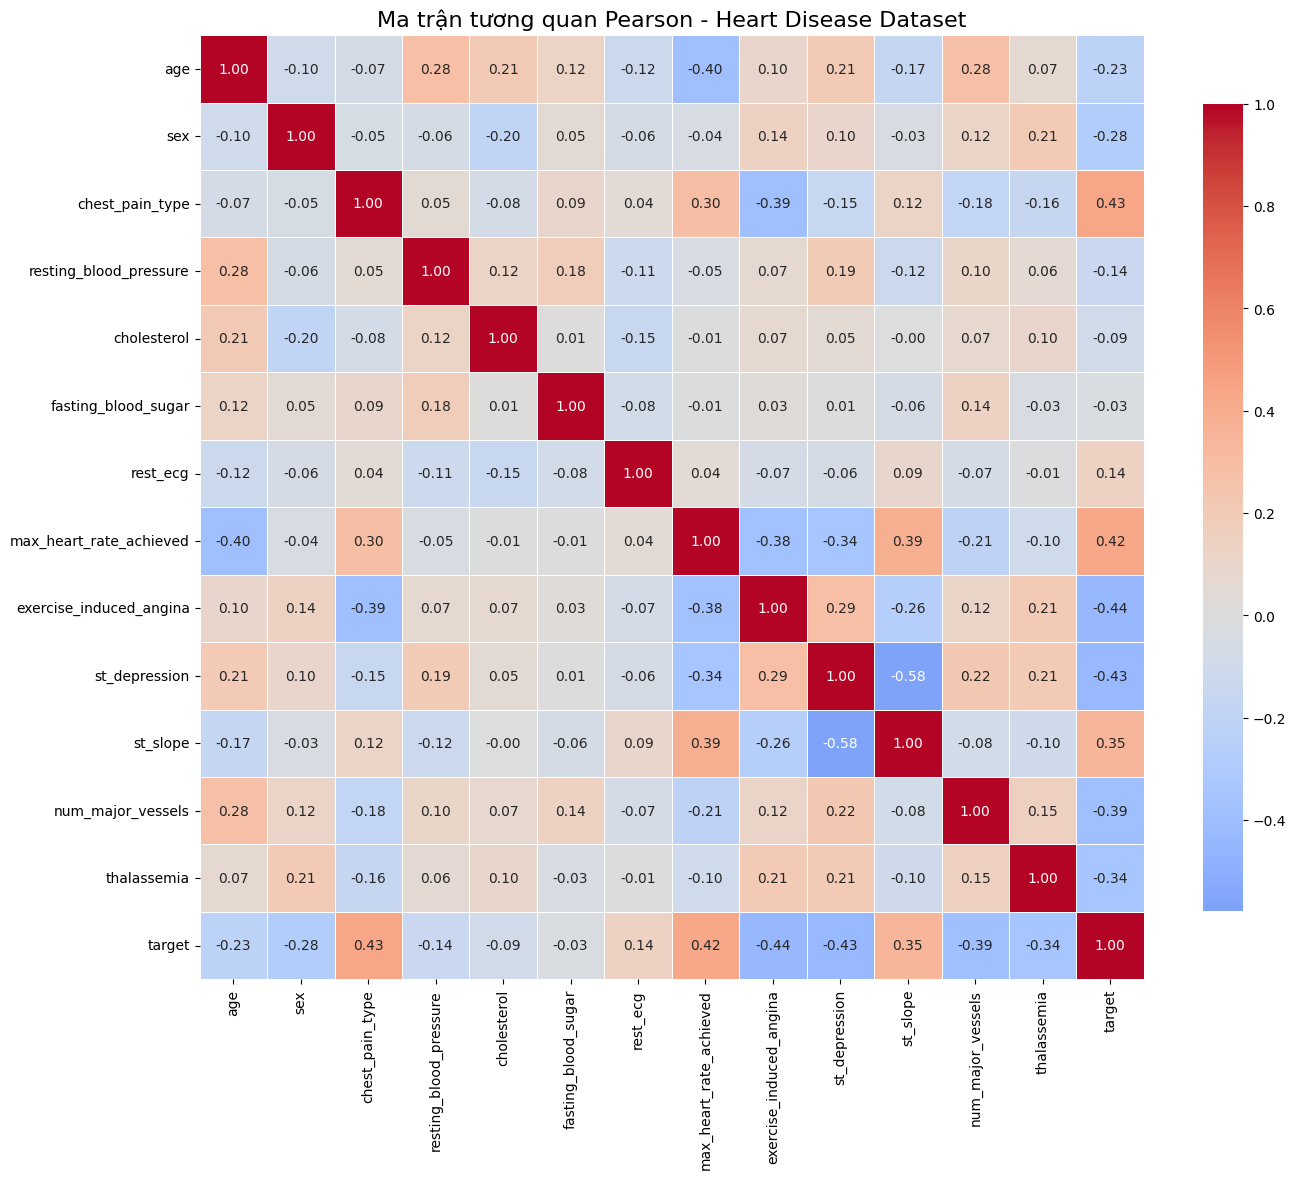

In [11]:
# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title('Ma trận tương quan Pearson - Heart Disease Dataset', fontsize=16)
plt.tight_layout()
plt.show()

In [12]:
# Tìm các cặp thuộc tính có độ tương quan cao (>0.8)
print("Các cặp thuộc tính có độ tương quan cao (|correlation| > 0.8):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            corr_val = correlation_matrix.iloc[i, j]
            high_corr_pairs.append((col1, col2, corr_val))
            print(f"  {col1} <-> {col2}: {corr_val:.4f}")

if len(high_corr_pairs) == 0:
    print("  Không có cặp thuộc tính nào có độ tương quan > 0.8")
    print("\nKết luận: Không cần loại bỏ cột nào.")
    cols_to_drop = []
else:
    # Loại bỏ các cột có độ tương quan cao (giữ cột đầu tiên)
    cols_to_drop = [pair[1] for pair in high_corr_pairs]
    print(f"\nCác cột sẽ bị loại bỏ: {cols_to_drop}")
    combined_data = combined_data.drop(columns=cols_to_drop)
    print(f"Số cột còn lại sau khi loại bỏ: {len(combined_data.columns)}")

Các cặp thuộc tính có độ tương quan cao (|correlation| > 0.8):
  Không có cặp thuộc tính nào có độ tương quan > 0.8

Kết luận: Không cần loại bỏ cột nào.


## Câu 4: Tách features và labels

In [13]:
# Tách thuộc tính quyết định 'target' ra khỏi dữ liệu
features = combined_data.drop('target', axis=1)
labels = combined_data['target']

print(f"Kích thước features: {features.shape}")
print(f"Kích thước labels: {labels.shape}")
print(f"\nCác cột trong features:\n{features.columns.tolist()}")
print(f"\nPhân bố labels:\n{labels.value_counts().sort_index()}")

Kích thước features: (303, 13)
Kích thước labels: (303,)

Các cột trong features:
['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']

Phân bố labels:
target
0    138
1    165
Name: count, dtype: int64


## Câu 5: Chuyển đổi về dạng One-Hot Vector

In [14]:
# Xác định các cột không phải dạng số
categorical_cols = features.select_dtypes(include=['object']).columns
print(f"Các cột categorical cần chuyển đổi: {categorical_cols.tolist()}")

if len(categorical_cols) > 0:
    # Chuyển đổi các cột categorical về dạng one-hot vector
    features = pd.get_dummies(features, columns=categorical_cols)
    print(f"\nĐã chuyển đổi {len(categorical_cols)} cột categorical sang one-hot encoding")
else:
    print("\nKhông có cột categorical nào cần chuyển đổi. Tất cả các cột đều là số.")

print(f"\nKích thước features sau xử lý: {features.shape}")
print(f"Các cột trong features:\n{features.columns.tolist()}")

Các cột categorical cần chuyển đổi: []

Không có cột categorical nào cần chuyển đổi. Tất cả các cột đều là số.

Kích thước features sau xử lý: (303, 13)
Các cột trong features:
['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']


## Câu 6: Tách dữ liệu huấn luyện và kiểm thử

In [15]:
# Tách features về train và test như ban đầu
X_train = features[:train_size]
X_test = features[train_size:]

# Tách labels về train và test như ban đầu
y_train = labels[:train_size]
y_test = labels[train_size:]

print(f"Kích thước X_train: {X_train.shape}")
print(f"Kích thước X_test: {X_test.shape}")
print(f"Kích thước y_train: {y_train.shape}")
print(f"Kích thước y_test: {y_test.shape}")

print(f"\nPhân bố y_train:\n{y_train.value_counts().sort_index()}")
print(f"\nPhân bố y_test:\n{y_test.value_counts().sort_index()}")

Kích thước X_train: (212, 13)
Kích thước X_test: (91, 13)
Kích thước y_train: (212,)
Kích thước y_test: (91,)

Phân bố y_train:
target
0     97
1    115
Name: count, dtype: int64

Phân bố y_test:
target
0    41
1    50
Name: count, dtype: int64


## Câu 7: Xây dựng cây quyết định ID3 (criterion='entropy')

In [16]:
# Xây dựng mô hình cây ID3
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_model.fit(X_train, y_train)

print("Mô hình cây ID3 đã được huấn luyện")
print(f"Độ sâu của cây: {id3_model.get_depth()}")
print(f"Số lượng lá: {id3_model.get_n_leaves()}")

Mô hình cây ID3 đã được huấn luyện
Độ sâu của cây: 11
Số lượng lá: 32


In [17]:
# Dự đoán trên tập kiểm thử
y_pred_id3 = id3_model.predict(X_test)

# Tính toán độ chính xác
accuracy_id3 = accuracy_score(y_test, y_pred_id3)
print(f"Độ chính xác của mô hình ID3: {accuracy_id3:.4f}")

# In classification report
print("\nClassification Report (ID3):")
print(classification_report(y_test, y_pred_id3, target_names=['No Disease', 'Disease']))

Độ chính xác của mô hình ID3: 0.7253

Classification Report (ID3):
              precision    recall  f1-score   support

  No Disease       0.69      0.71      0.70        41
     Disease       0.76      0.74      0.75        50

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91



Ma trận nhầm lẫn (ID3):
[[29 12]
 [13 37]]


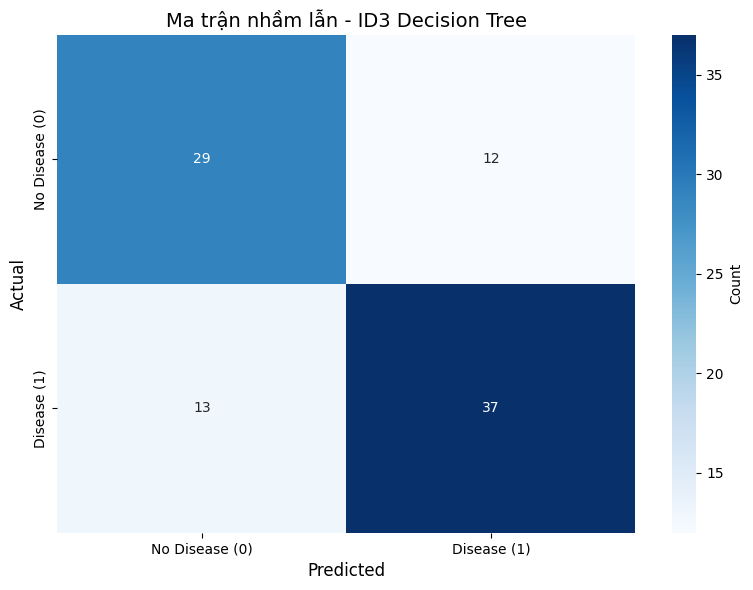

In [18]:
# Tính toán ma trận nhầm lẫn
cm_id3 = confusion_matrix(y_test, y_pred_id3)
print("Ma trận nhầm lẫn (ID3):")
print(cm_id3)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_id3, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease (0)', 'Disease (1)'], 
            yticklabels=['No Disease (0)', 'Disease (1)'],
            cbar_kws={'label': 'Count'})
plt.title('Ma trận nhầm lẫn - ID3 Decision Tree', fontsize=14)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

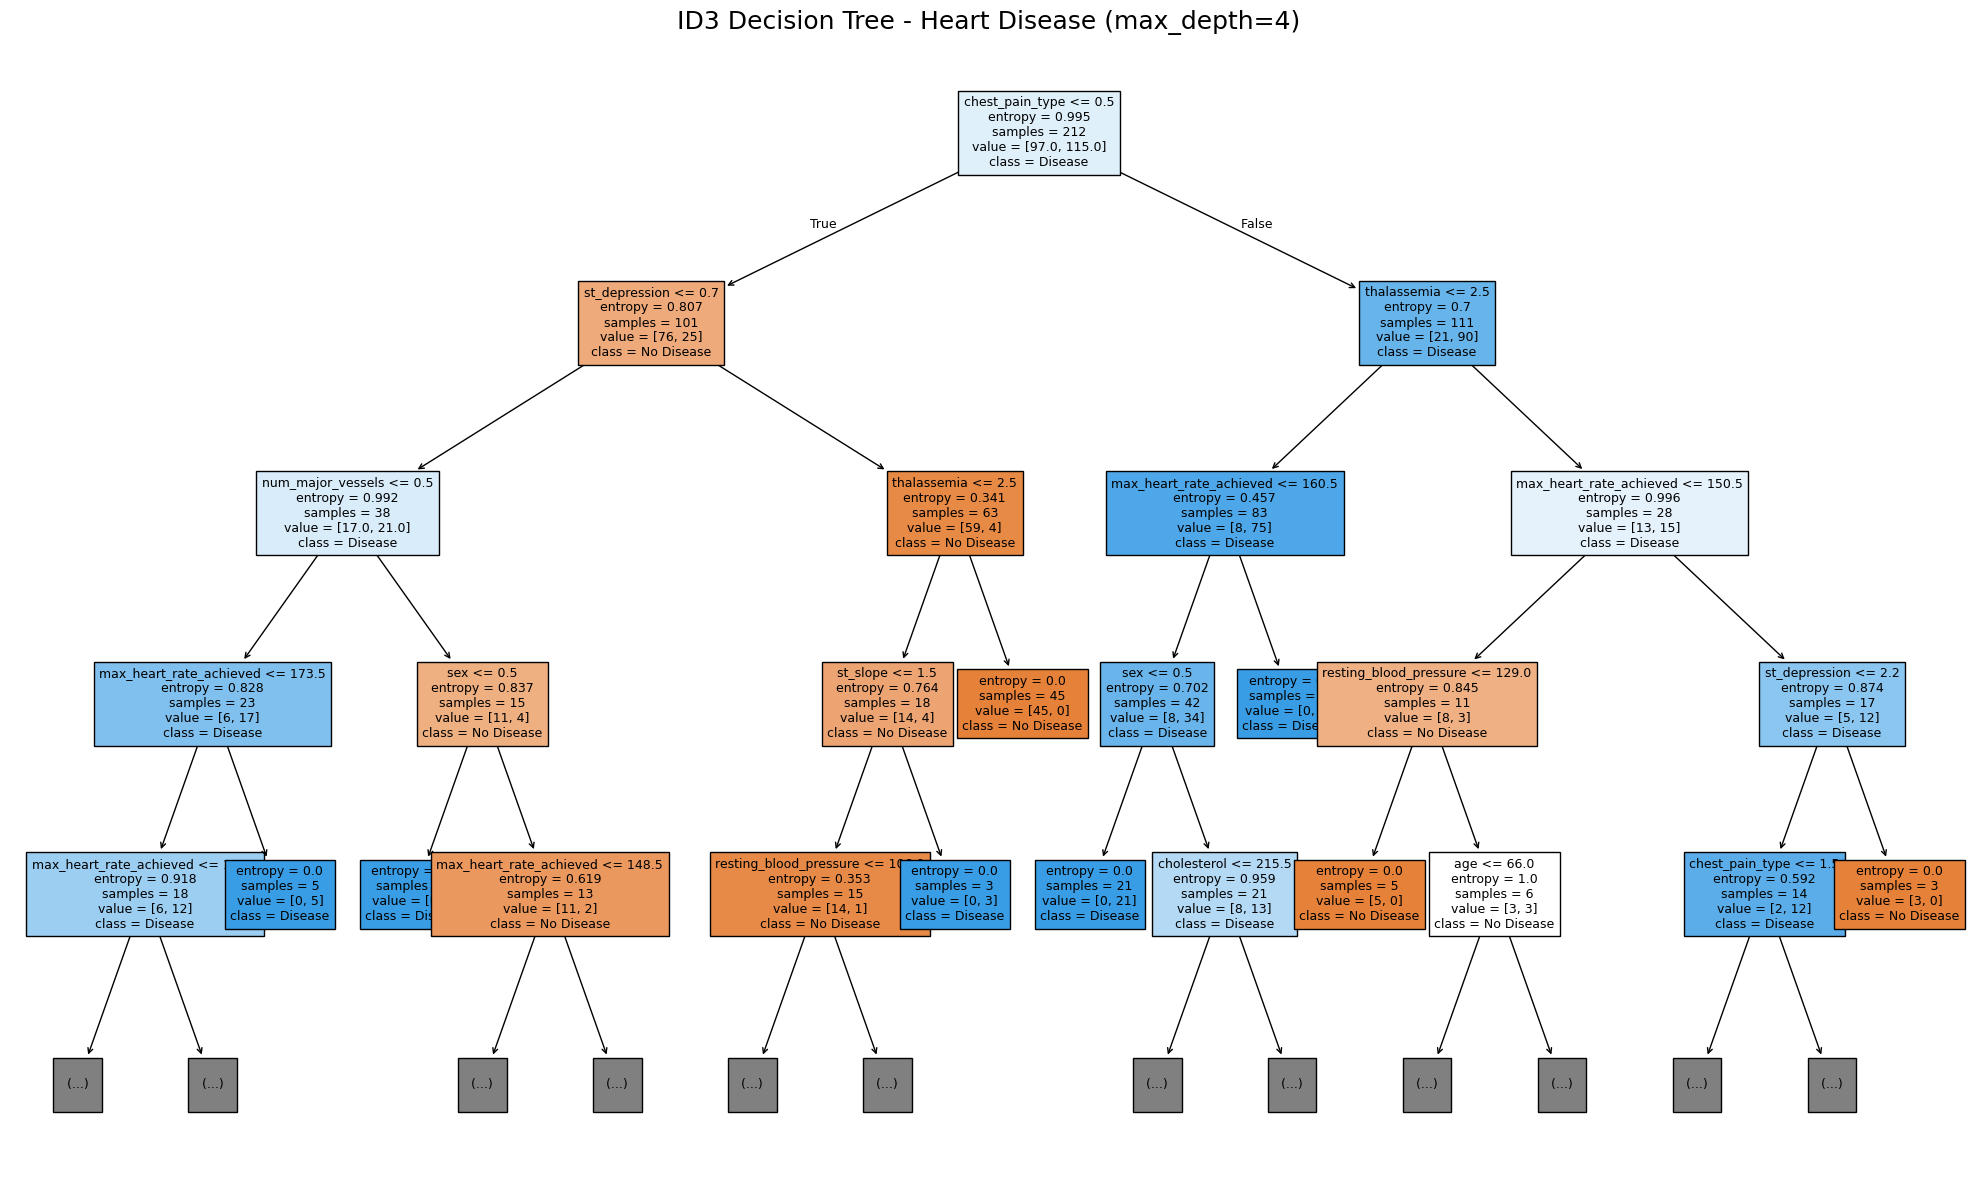

Đã lưu cây ID3 vào file 'heart_id3_decision_tree.png'


In [19]:
# Biểu diễn cây ID3 (giới hạn độ sâu để dễ quan sát)
plt.figure(figsize=(20, 12))
tree.plot_tree(id3_model, 
               feature_names=X_train.columns, 
               class_names=['No Disease', 'Disease'],
               filled=True, 
               max_depth=4,  # Giới hạn độ sâu hiển thị
               fontsize=9)
plt.title('ID3 Decision Tree - Heart Disease (max_depth=4)', fontsize=18)
plt.tight_layout()
plt.savefig('heart_id3_decision_tree.png', dpi=100, bbox_inches='tight')
plt.show()
print("Đã lưu cây ID3 vào file 'heart_id3_decision_tree.png'")

Top 10 thuộc tính quan trọng nhất (ID3):


,feature,importance
2,chest_pain_type,0.265365
7,max_heart_rate_achieved,0.179686
9,st_depression,0.146334
12,thalassemia,0.107832
0,age,0.066089
1,sex,0.065759
3,resting_blood_pressure,0.040775
10,st_slope,0.040092
11,num_major_vessels,0.028928
4,cholesterol,0.024567


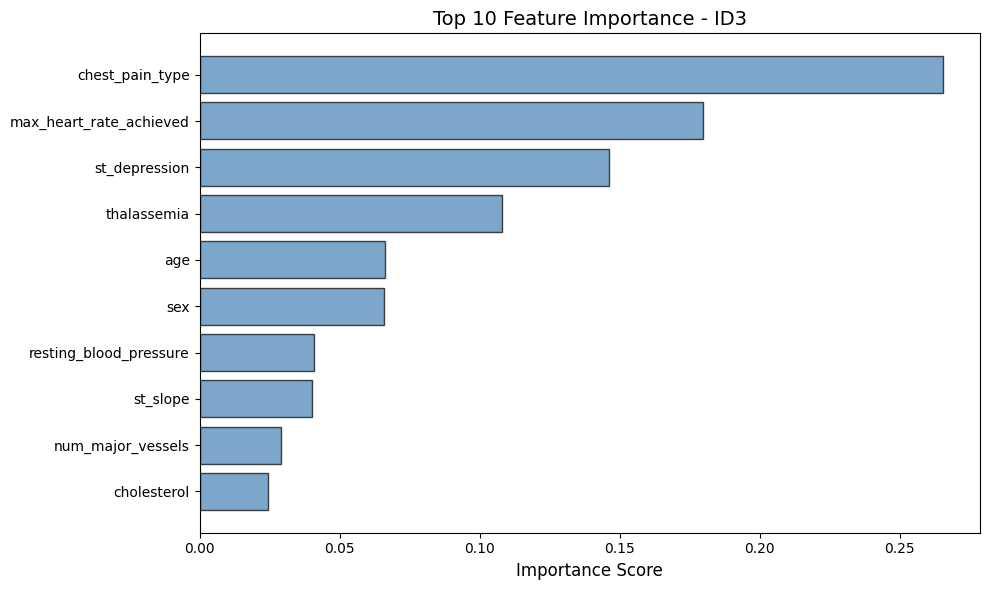

In [20]:
# Feature importance của ID3
feature_importance_id3 = pd.DataFrame({
    'feature': X_train.columns,
    'importance': id3_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 thuộc tính quan trọng nhất (ID3):")
display(feature_importance_id3.head(10))

# Vẽ biểu đồ feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance_id3.head(10)
plt.barh(top_features['feature'][::-1], top_features['importance'][::-1],
         color='steelblue', alpha=0.7, edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 10 Feature Importance - ID3', fontsize=14)
plt.tight_layout()
plt.show()

## Câu 8: Xây dựng cây quyết định CART (criterion='gini')

In [21]:
# Xây dựng mô hình cây CART
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_model.fit(X_train, y_train)

print("Mô hình cây CART đã được huấn luyện")
print(f"Độ sâu của cây: {cart_model.get_depth()}")
print(f"Số lượng lá: {cart_model.get_n_leaves()}")

Mô hình cây CART đã được huấn luyện
Độ sâu của cây: 8
Số lượng lá: 35


In [22]:
# Dự đoán trên tập kiểm thử
y_pred_cart = cart_model.predict(X_test)

# Tính toán độ chính xác
accuracy_cart = accuracy_score(y_test, y_pred_cart)
print(f"Độ chính xác của mô hình CART: {accuracy_cart:.4f}")

# In classification report
print("\nClassification Report (CART):")
print(classification_report(y_test, y_pred_cart, target_names=['No Disease', 'Disease']))

Độ chính xác của mô hình CART: 0.7253

Classification Report (CART):
              precision    recall  f1-score   support

  No Disease       0.68      0.73      0.71        41
     Disease       0.77      0.72      0.74        50

    accuracy                           0.73        91
   macro avg       0.72      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



Ma trận nhầm lẫn (CART):
[[30 11]
 [14 36]]


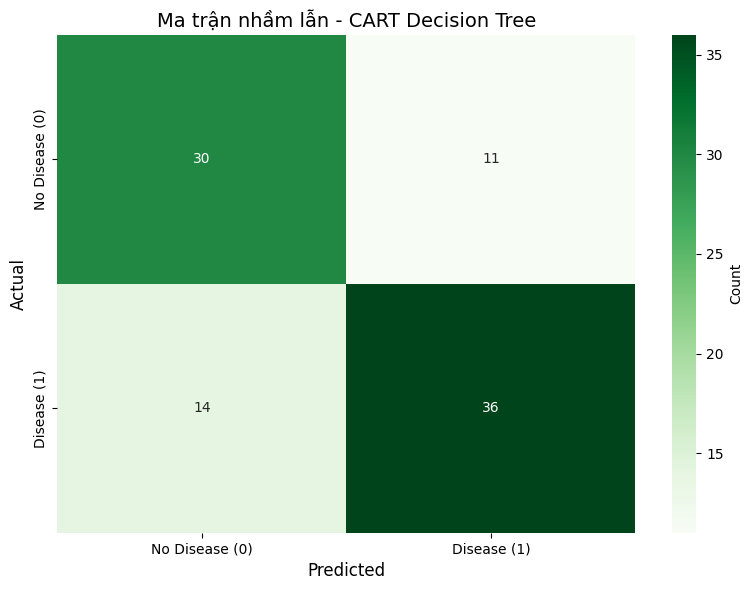

In [23]:
# Tính toán ma trận nhầm lẫn
cm_cart = confusion_matrix(y_test, y_pred_cart)
print("Ma trận nhầm lẫn (CART):")
print(cm_cart)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cart, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No Disease (0)', 'Disease (1)'], 
            yticklabels=['No Disease (0)', 'Disease (1)'],
            cbar_kws={'label': 'Count'})
plt.title('Ma trận nhầm lẫn - CART Decision Tree', fontsize=14)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

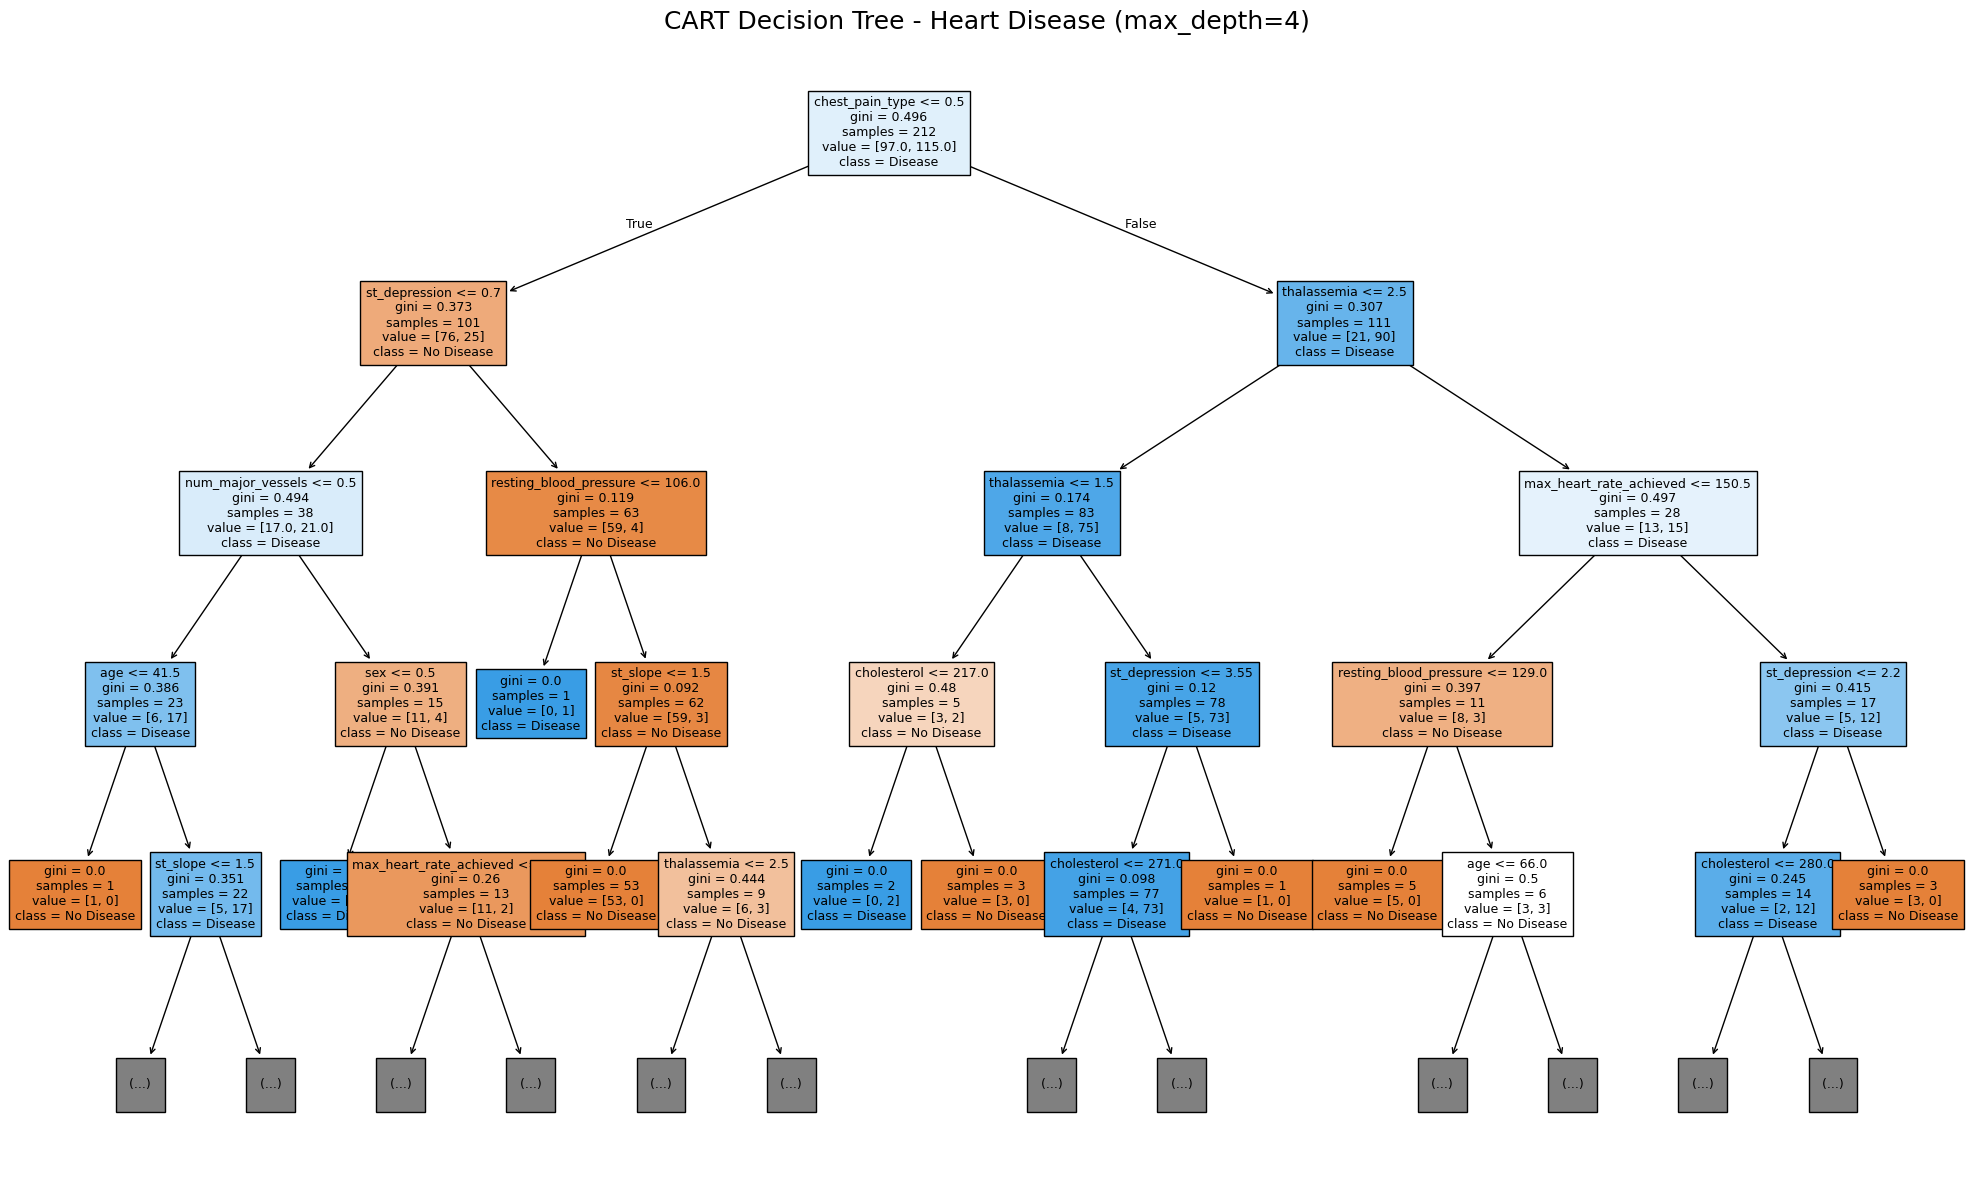

Đã lưu cây CART vào file 'heart_cart_decision_tree.png'


In [24]:
# Biểu diễn cây CART (giới hạn độ sâu để dễ quan sát)
plt.figure(figsize=(20, 12))
tree.plot_tree(cart_model, 
               feature_names=X_train.columns, 
               class_names=['No Disease', 'Disease'],
               filled=True, 
               max_depth=4,  # Giới hạn độ sâu hiển thị
               fontsize=9)
plt.title('CART Decision Tree - Heart Disease (max_depth=4)', fontsize=18)
plt.tight_layout()
plt.savefig('heart_cart_decision_tree.png', dpi=100, bbox_inches='tight')
plt.show()
print("Đã lưu cây CART vào file 'heart_cart_decision_tree.png'")

Top 10 thuộc tính quan trọng nhất (CART):


,feature,importance
2,chest_pain_type,0.333545
9,st_depression,0.159138
12,thalassemia,0.117512
7,max_heart_rate_achieved,0.082267
4,cholesterol,0.075759
1,sex,0.050736
3,resting_blood_pressure,0.050144
0,age,0.041670
11,num_major_vessels,0.038516
10,st_slope,0.037939


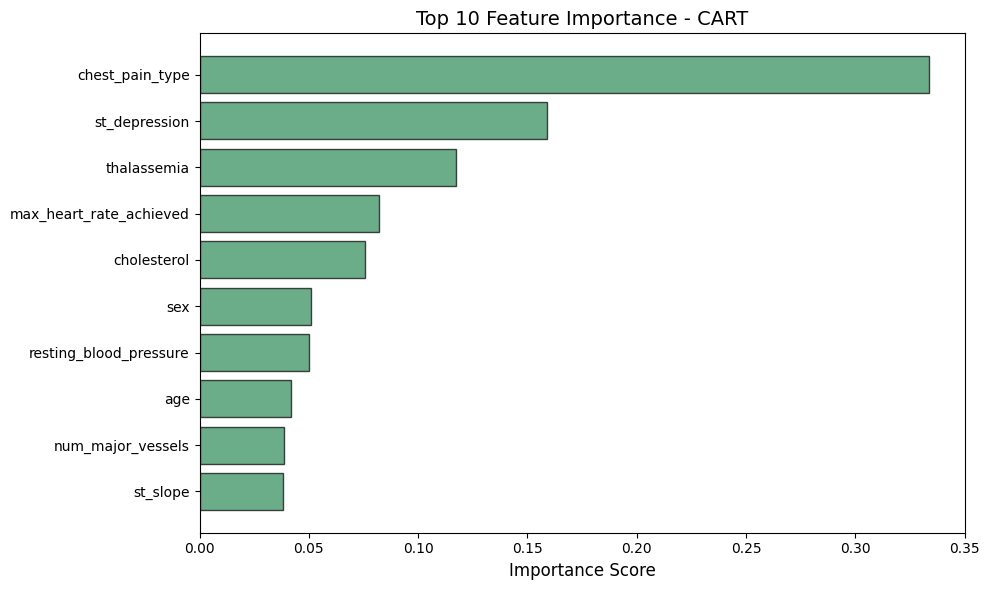

In [25]:
# Feature importance của CART
feature_importance_cart = pd.DataFrame({
    'feature': X_train.columns,
    'importance': cart_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 thuộc tính quan trọng nhất (CART):")
display(feature_importance_cart.head(10))

# Vẽ biểu đồ feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance_cart.head(10)
plt.barh(top_features['feature'][::-1], top_features['importance'][::-1],
         color='seagreen', alpha=0.7, edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 10 Feature Importance - CART', fontsize=14)
plt.tight_layout()
plt.show()

## Câu 9: Xây dựng mô hình Naïve Bayes

In [26]:
# Xây dựng mô hình Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

print("Mô hình Naïve Bayes đã được huấn luyện")

Mô hình Naïve Bayes đã được huấn luyện


In [27]:
# Dự đoán trên tập kiểm thử
y_pred_nb = nb_model.predict(X_test)

# Tính toán độ chính xác
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Độ chính xác của mô hình Naïve Bayes: {accuracy_nb:.4f}")

# In classification report
print("\nClassification Report (Naïve Bayes):")
print(classification_report(y_test, y_pred_nb, target_names=['No Disease', 'Disease']))

Độ chính xác của mô hình Naïve Bayes: 0.7912

Classification Report (Naïve Bayes):
              precision    recall  f1-score   support

  No Disease       0.81      0.71      0.75        41
     Disease       0.78      0.86      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.79        91
weighted avg       0.79      0.79      0.79        91



Ma trận nhầm lẫn (Naïve Bayes):
[[29 12]
 [ 7 43]]


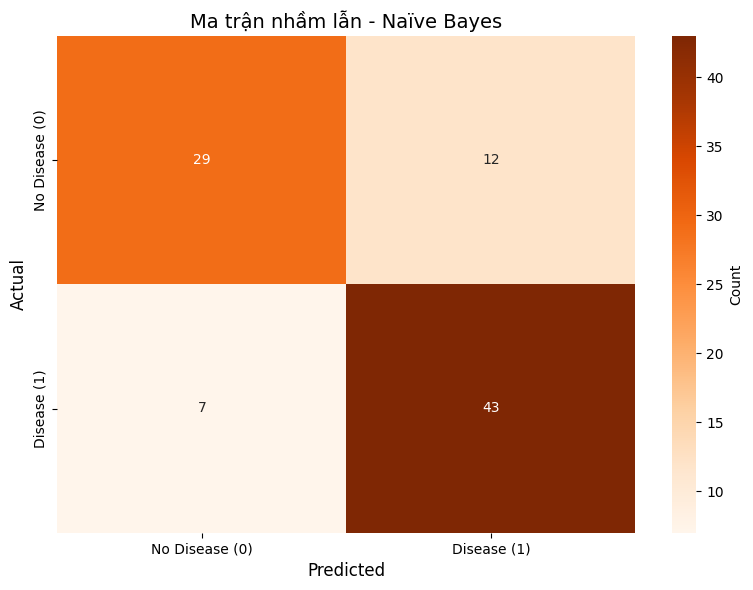

In [28]:
# Tính toán ma trận nhầm lẫn
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Ma trận nhầm lẫn (Naïve Bayes):")
print(cm_nb)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['No Disease (0)', 'Disease (1)'], 
            yticklabels=['No Disease (0)', 'Disease (1)'],
            cbar_kws={'label': 'Count'})
plt.title('Ma trận nhầm lẫn - Naïve Bayes', fontsize=14)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

## Câu 10: So sánh kết quả các mô hình

In [29]:
# Tổng hợp kết quả
results = pd.DataFrame({
    'Model': ['ID3 (Entropy)', 'CART (Gini)', 'Naïve Bayes'],
    'Accuracy': [accuracy_id3, accuracy_cart, accuracy_nb],
    'Tree Depth': [id3_model.get_depth(), cart_model.get_depth(), 'N/A'],
    'Number of Leaves': [id3_model.get_n_leaves(), cart_model.get_n_leaves(), 'N/A']
})

print("="*80)
print("SO SÁNH KẾT QUẢ CÁC MÔ HÌNH - HEART DISEASE")
print("="*80)
display(results)
print("="*80)

SO SÁNH KẾT QUẢ CÁC MÔ HÌNH - HEART DISEASE


,Model,Accuracy,Tree Depth,Number of Leaves
0,ID3 (Entropy),0.725275,11,32
1,CART (Gini),0.725275,8,35
2,Naïve Bayes,0.791209,N/A,N/A


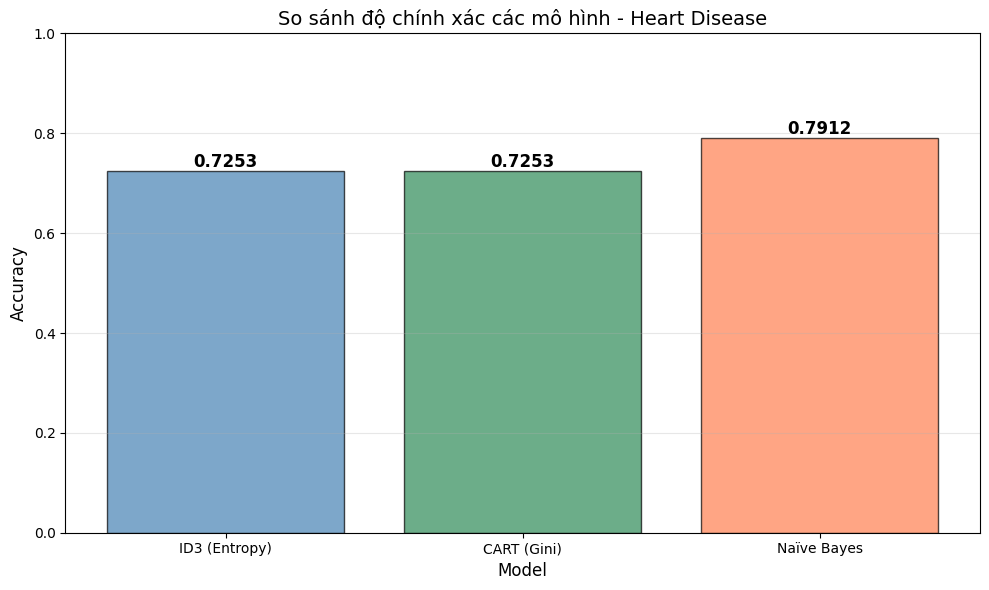

In [30]:
# Vẽ biểu đồ so sánh accuracy
plt.figure(figsize=(10, 6))
bars = plt.bar(results['Model'], results['Accuracy'], 
               color=['steelblue', 'seagreen', 'coral'], alpha=0.7, edgecolor='black')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.title('So sánh độ chính xác các mô hình - Heart Disease', fontsize=14)
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

# Thêm giá trị trên các cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

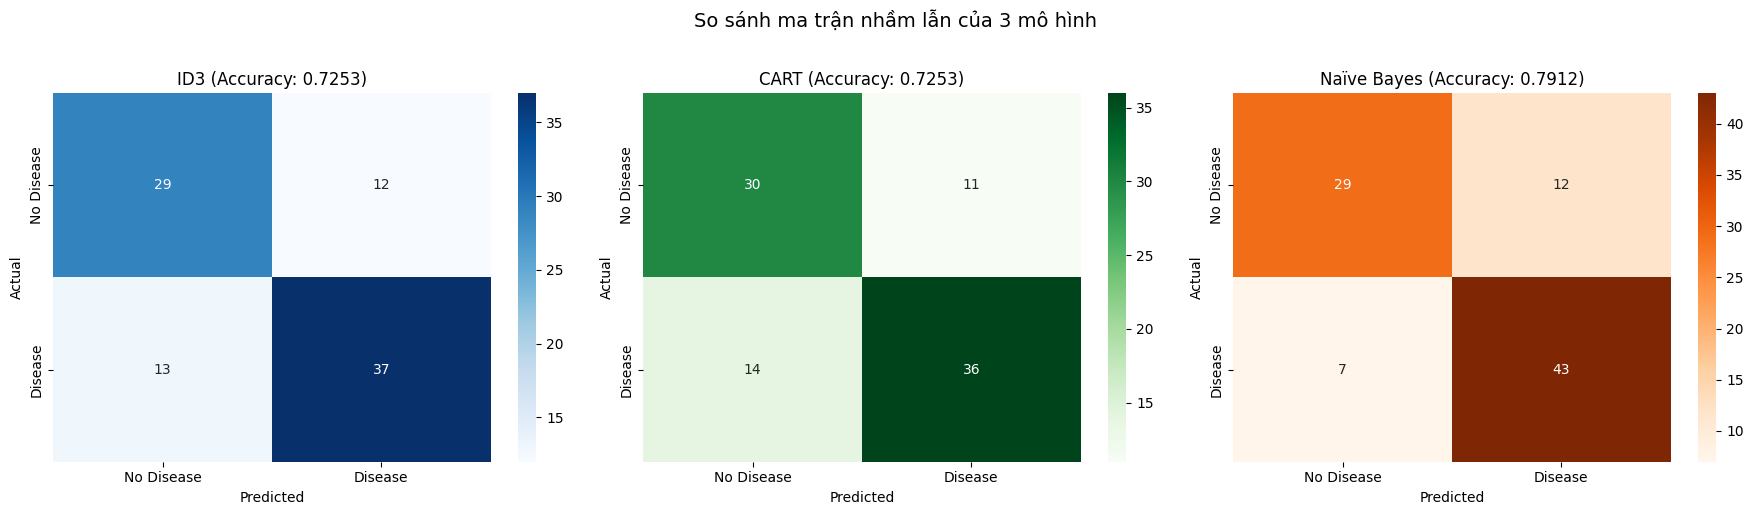

In [31]:
# So sánh ma trận nhầm lẫn của 3 mô hình
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ID3
sns.heatmap(cm_id3, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
axes[0].set_title(f'ID3 (Accuracy: {accuracy_id3:.4f})', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=10)
axes[0].set_xlabel('Predicted', fontsize=10)

# CART
sns.heatmap(cm_cart, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
axes[1].set_title(f'CART (Accuracy: {accuracy_cart:.4f})', fontsize=12)
axes[1].set_ylabel('Actual', fontsize=10)
axes[1].set_xlabel('Predicted', fontsize=10)

# Naïve Bayes
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges', ax=axes[2],
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
axes[2].set_title(f'Naïve Bayes (Accuracy: {accuracy_nb:.4f})', fontsize=12)
axes[2].set_ylabel('Actual', fontsize=10)
axes[2].set_xlabel('Predicted', fontsize=10)

plt.suptitle('So sánh ma trận nhầm lẫn của 3 mô hình', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


So sánh chi tiết các metrics:


,Model,Accuracy,Precision,Recall,F1-Score
0,ID3 (Entropy),0.725275,0.755102,0.74,0.747475
1,CART (Gini),0.725275,0.765957,0.72,0.742268
2,Naïve Bayes,0.791209,0.781818,0.86,0.819048


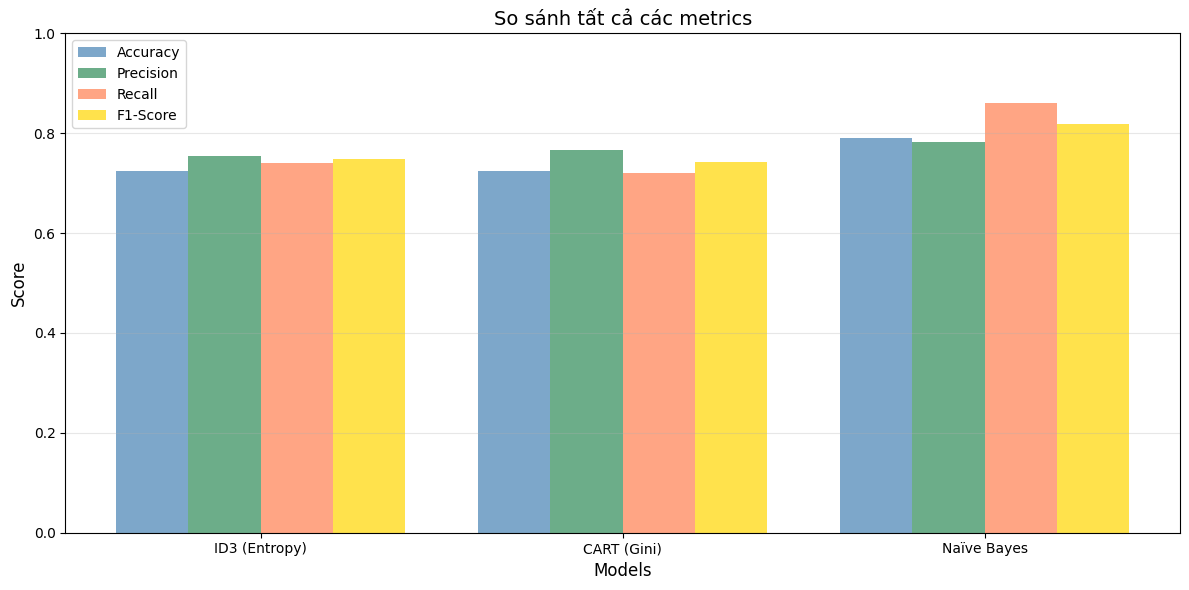

In [32]:
# Tính toán các metrics chi tiết cho từng mô hình
from sklearn.metrics import precision_score, recall_score, f1_score

# ID3
precision_id3 = precision_score(y_test, y_pred_id3)
recall_id3 = recall_score(y_test, y_pred_id3)
f1_id3 = f1_score(y_test, y_pred_id3)

# CART
precision_cart = precision_score(y_test, y_pred_cart)
recall_cart = recall_score(y_test, y_pred_cart)
f1_cart = f1_score(y_test, y_pred_cart)

# Naïve Bayes
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Tạo bảng so sánh chi tiết
detailed_results = pd.DataFrame({
    'Model': ['ID3 (Entropy)', 'CART (Gini)', 'Naïve Bayes'],
    'Accuracy': [accuracy_id3, accuracy_cart, accuracy_nb],
    'Precision': [precision_id3, precision_cart, precision_nb],
    'Recall': [recall_id3, recall_cart, recall_nb],
    'F1-Score': [f1_id3, f1_cart, f1_nb]
})

print("\nSo sánh chi tiết các metrics:")
display(detailed_results)

# Vẽ biểu đồ so sánh tất cả metrics
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(detailed_results['Model']))
width = 0.2

ax.bar(x - 1.5*width, detailed_results['Accuracy'], width, label='Accuracy', color='steelblue', alpha=0.7)
ax.bar(x - 0.5*width, detailed_results['Precision'], width, label='Precision', color='seagreen', alpha=0.7)
ax.bar(x + 0.5*width, detailed_results['Recall'], width, label='Recall', color='coral', alpha=0.7)
ax.bar(x + 1.5*width, detailed_results['F1-Score'], width, label='F1-Score', color='gold', alpha=0.7)

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('So sánh tất cả các metrics', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(detailed_results['Model'])
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()